In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('4.2-economic_index.csv')

In [3]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
### Drop unnecessary column
df.drop(columns=['Unnamed: 0', 'year', 'month'], axis=1, inplace=True)

In [5]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
### Check null values
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

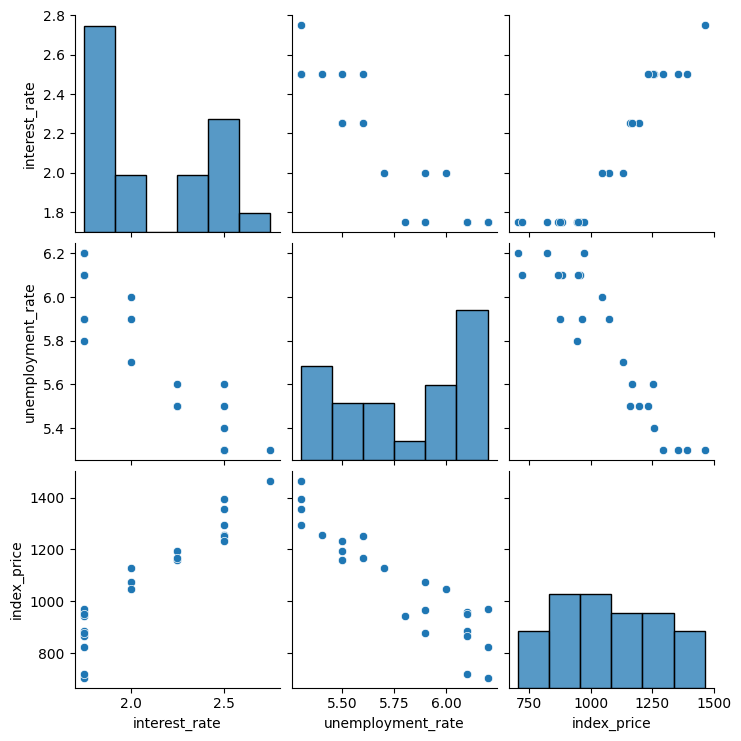

In [7]:
### Lets do some visualization
sns.pairplot(df)

In [8]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment rate')

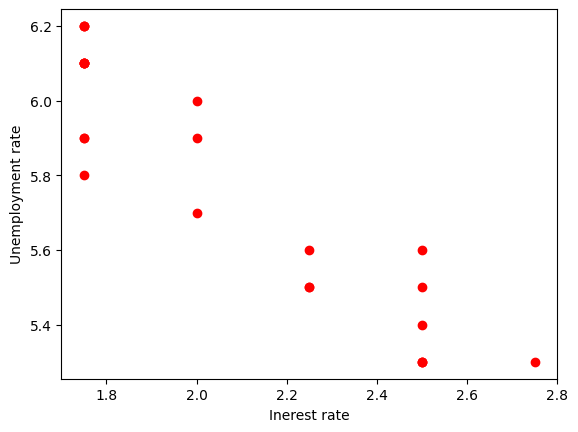

In [12]:
### Visualize the data points more closely
plt.scatter(df['interest_rate'], df['unemployment_rate'], c='r')
plt.xlabel('Inerest rate')
plt.ylabel('Unemployment rate')

In [13]:
### Independent and dependent feature

# x = df[['index_price', 'unemployment_rate']]    
# Another way

x = df.iloc[:, : -1]
y = df.iloc[:, -1]

In [14]:
x.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [15]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [16]:
### Train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [18]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((18, 2), (6, 2), (18,), (6,))

<Axes: xlabel='interest_rate', ylabel='index_price'>

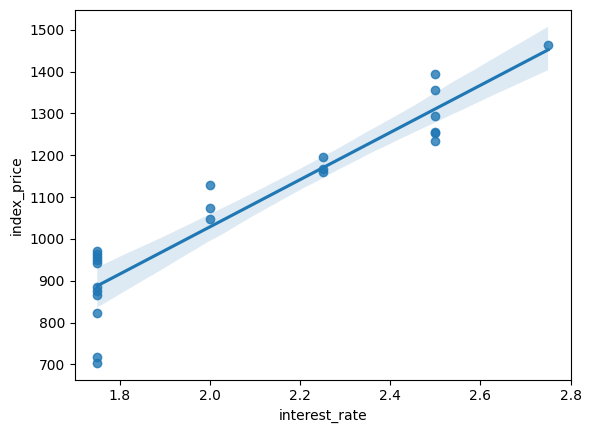

In [ ]:
### To plot a data in a linear regression model fit we can use regression plot of seaborn
### But we cannot do this for more than two features. i.e. we cannot basically create a 3D plot.
sns.regplot(x=df['interest_rate'], y=df['index_price'], data=df)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

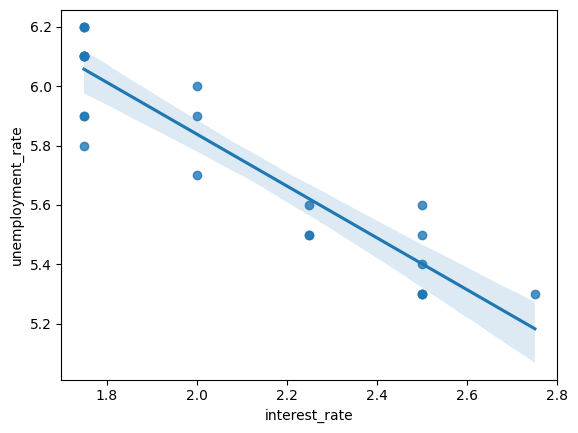

In [23]:
sns.regplot(x=df['interest_rate'], y=df['unemployment_rate'], data=df)

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

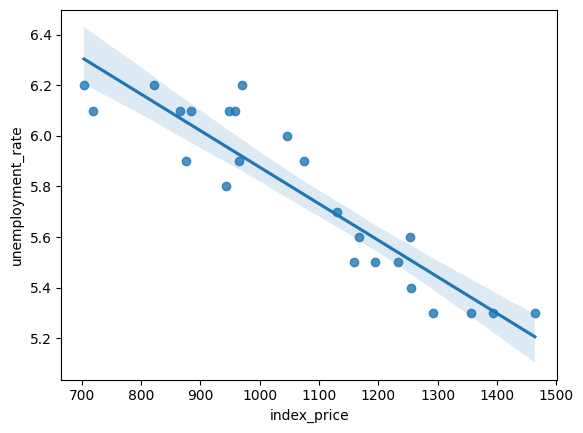

In [24]:
sns.regplot(x=df['index_price'], y=df['unemployment_rate'], data=df)

In [ ]:
### Standardization
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [32]:
x_train = scaler.fit_transform(x_train) ## it converts this into a two dimensional array
x_test = scaler.fit_transform(x_test)

In [31]:
x_train, x_test

(array([[-0.93508297,  0.01742626],
        [-0.93508297,  0.3310989 ],
        [ 1.26032922, -0.60991902],
        [-0.20327891, -0.29624638],
        [-0.93508297,  0.95844418],
        [ 0.52852516, -0.60991902],
        [-0.93508297,  0.95844418],
        [-0.20327891,  0.64477154],
        [ 0.52852516, -0.92359166],
        [ 1.26032922, -1.55093694],
        [-0.20327891,  0.3310989 ],
        [-0.93508297,  0.95844418],
        [ 1.99213329, -1.55093694],
        [-0.93508297,  1.27211682],
        [ 1.26032922, -1.55093694],
        [-0.93508297,  1.27211682],
        [ 1.26032922, -0.92359166],
        [-0.93508297,  1.27211682]]),
 array([[ 0.48507125, -0.65912616],
        [ 1.21267813, -1.26755032],
        [-0.9701425 ,  1.16614629],
        [ 1.21267813, -0.96333824],
        [-0.9701425 ,  1.16614629],
        [-0.9701425 ,  0.55772214]]))

In [33]:
### Model training
from sklearn.linear_model import  LinearRegression

In [34]:
regression = LinearRegression()

In [41]:
regression.fit(x_train, y_train)

LinearRegression()

In [42]:
print("Coefficient or Slope:", regression.coef_)
print("Intercept:", regression.intercept_)

Coefficient or Slope: [132.34055664 -69.70799526]
Intercept: 1058.7222222222222


In [40]:
### Cross Validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, x_train, y_train, scoring='neg_mean_squared_error', cv=3)

In [38]:
validation_score

array([-3113.54000866, -6998.83168779, -7598.74627439])

In [39]:
np.mean(validation_score)

np.float64(-5903.705990282717)

In [ ]:
### Prediction
y_pred = regression.predict(x_test)